In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Load dataset (assuming it's already cleaned)
df = pd.read_csv("Dataset.csv")
df.shape


(501, 16)

In [23]:
df_cleaned = df.dropna(subset=["Revenue_$"])

In [24]:

df_cleaned["Revenue_$"] = pd.to_numeric(df_cleaned["Revenue_$"].replace(r'[$,]', '', regex=True), errors="coerce")
df_cleaned["Budget_USD"] = pd.to_numeric(df_cleaned["Budget_USD"].replace(r'[$,]', '', regex=True), errors="coerce")
df_cleaned["Vote_Average"] = pd.to_numeric(df_cleaned["Vote_Average"], errors="coerce")
df_cleaned["Vote_Count"] = pd.to_numeric(df_cleaned["Vote_Count"], errors="coerce")

In [25]:
df_cleaned = df_cleaned.dropna()

# Define features and target variable
X = df_cleaned[["Budget_USD", "Vote_Average", "Vote_Count"]]
y = df_cleaned["Revenue_$"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): $70.33
Mean Squared Error (MSE): 44,521.00
R² Score: -0.12


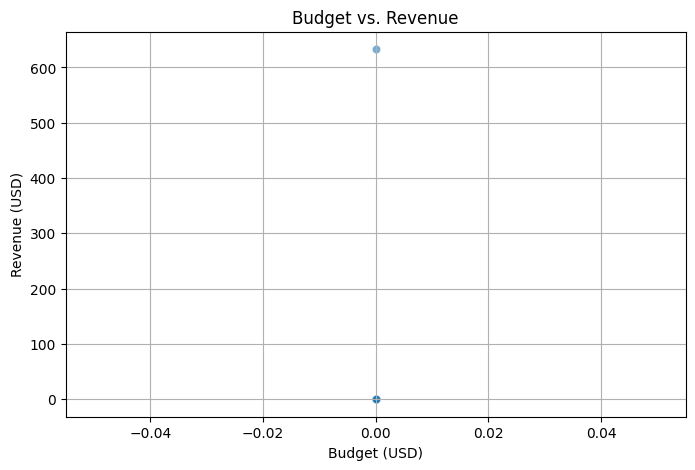

In [30]:
# Budget vs. Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["Budget_USD"], y=df_cleaned["Revenue_$"], alpha=0.6)
plt.xlabel("Budget (USD)")
plt.ylabel("Revenue (USD)")
plt.title("Budget vs. Revenue")
plt.grid(True)
plt.show()


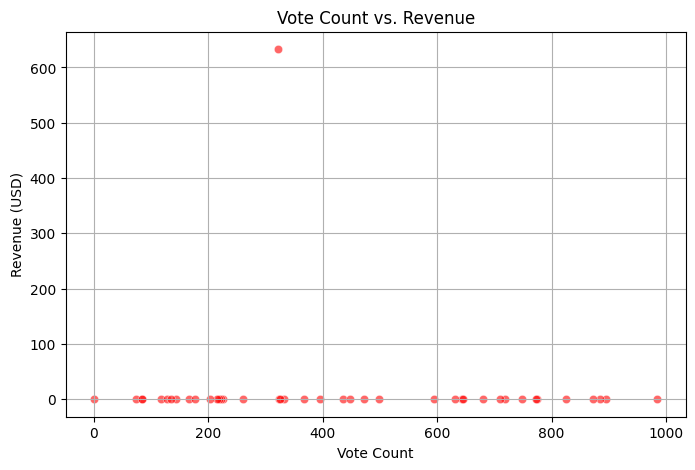

In [31]:
# Vote Count vs. Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["Vote_Count"], y=df_cleaned["Revenue_$"], alpha=0.6, color="red")
plt.xlabel("Vote Count")
plt.ylabel("Revenue (USD)")
plt.title("Vote Count vs. Revenue")
plt.grid(True)
plt.show()


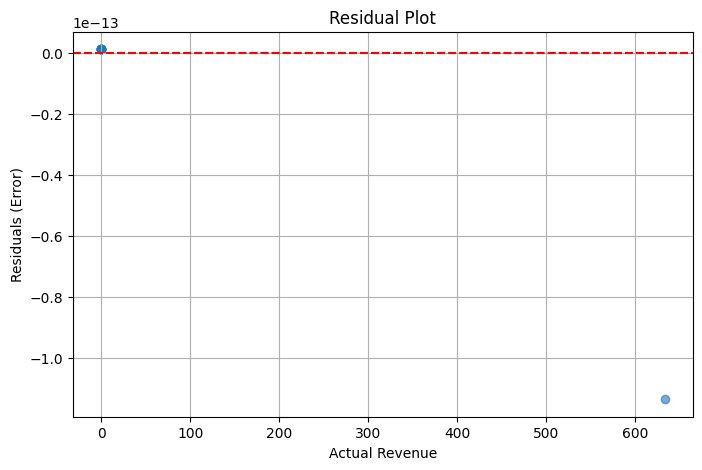

In [33]:
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred - y_test, scatter_kws={"alpha": 0.6})
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Actual Revenue")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


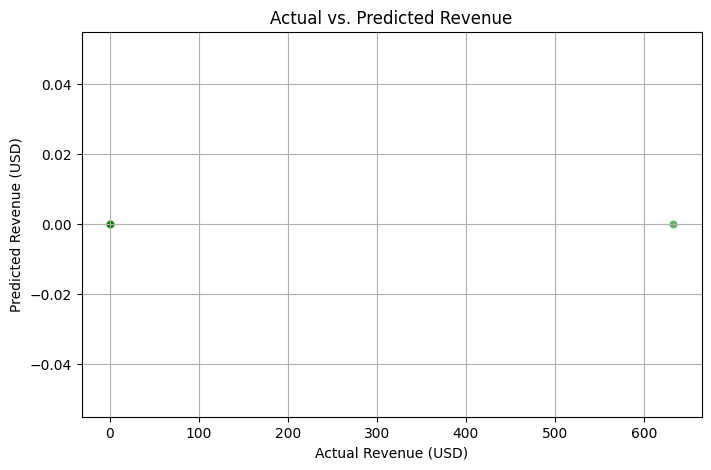

In [18]:
# Actual vs. Predicted Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="green")
plt.xlabel("Actual Revenue (USD)")
plt.ylabel("Predicted Revenue (USD)")
plt.title("Actual vs. Predicted Revenue")
plt.grid(True)
plt.show()